In [10]:
import numpy as np
from matplotlib import pyplot as plt
def generate_triangular_lattice(H=500, W=500, spacing=30, sigma=2.5, amplitude=1.0, center=None):
    """
    Generate a triangular lattice pattern as a 2D numpy array.

    Parameters
    ----------
    H, W : int
        Height and width of the output array.
    spacing : float
        Distance between nearest lattice points (in pixels).
    sigma : float
        Gaussian peak width (standard deviation in pixels).
    amplitude : float
        Peak height.
    center : tuple(float, float) or None
        Center of the lattice in (x, y) pixel coordinates.
        Can be fractional (subpixel precision). If None, defaults to image center.

    Returns
    -------
    data : np.ndarray
        2D numpy array of shape (H, W) with normalized values in range [0, 1].
    """
    # Lattice basis vectors (triangular symmetry)
    a1 = np.array([1.0, 0.0])
    a2 = np.array([0.5, np.sqrt(3) / 2])

    # Coordinate grid
    y = np.arange(H)
    x = np.arange(W)
    X, Y = np.meshgrid(x, y)

    # Set center
    if center is None:
        center = (W / 2, H / 2)
    center = np.array(center, dtype=float)  # allow subpixel

    # Output array
    data = np.zeros((H, W), dtype=float)

    # Number of lattice points in each direction
    n_i = int(W / spacing) + 6
    n_j = int(H / spacing) + 6

    # Generate Gaussian peaks
    for i in range(-n_i, n_i + 1):
        for j in range(-n_j, n_j + 1):
            pos = (i * a1 + j * a2) * spacing + center
            px, py = pos
            # Skip points too far outside image
            if px < -3*sigma or px > W + 3*sigma or py < -3*sigma or py > H + 3*sigma:
                continue
            rr = (X - px) ** 2 + (Y - py) ** 2
            data += amplitude * np.exp(-rr / (2 * sigma ** 2))

    # Normalize to 0..1
    data = (data - data.min()) / (data.max() - data.min())

    return data
    

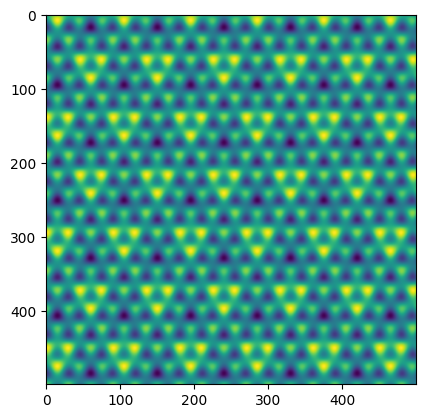

In [11]:
import numpy as np

def get_angle_vector(angle_deg):
    theta = np.radians(angle_deg)
    return np.array([np.cos(theta), np.sin(theta)])
cs = get_angle_vector


r3 = np.sqrt(3)
H=500 
W=500
spacing=30
sigma=15
posYinYangs = np.array(((0,0),
                        r3*30*cs(30)))
shifts = 15*r3*np.array((
    cs(210),
    cs(330),
    cs(90)
))*0.8


def base_lattice():
    img = np.zeros((H,W))
    img += generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(30))
    img -= generate_triangular_lattice(H=H, W=W, spacing=spacing, sigma=sigma, center= (spacing/r3)*cs(-30))
    return img


def cdw(center_shift = (0,0)):
    img = np.zeros((H,W))
    for iyy in range(2):
        posYinYang = posYinYangs[iyy] 
        for ishift in range(3):
            shift = shifts[ishift]
            center = posYinYang + shift * (-2*iyy+1) + center_shift #+ 30*cs(120)*i4             
            corrugation_now = generate_triangular_lattice(H=H, W=W, spacing=spacing*3, sigma=sigma,  center=center)*.5
            img += corrugation_now* (-2*iyy+1)
    return img
img = base_lattice() + (cdw(0)+ cdw(30*cs(0))+ cdw(30*cs(-60)))/2


plt.imshow(img,cmap= 'viridis',vmax=img.max(),vmin=img.min())
# plt.plot(240,240,'ro')

In [12]:
30*cs(0)

array([30.,  0.])

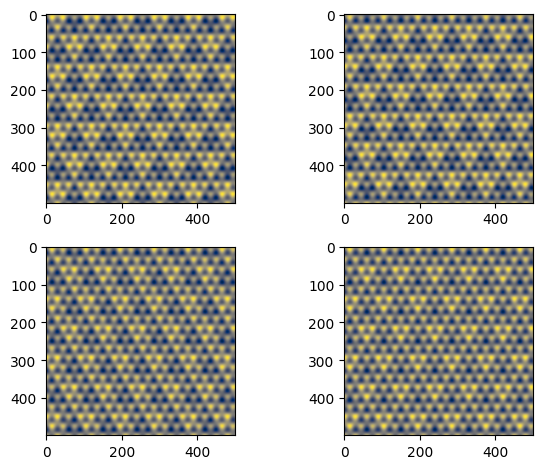

In [13]:
fig,axs = plt.subplots(2,2)
bl = base_lattice()
img1 = bl + cdw(30*cs(0))
img2 = bl + (cdw(30*cs(-60)))
img3 = bl + (cdw(30*cs(0))+ cdw(30*cs(-60)))/2
img4 = bl + (cdw(0)+ cdw(30*cs(0))+ cdw(30*cs(-60)))/3
cmap = 'cividis'
axs[0,0].imshow(img1,cmap=cmap)
axs[0,1].imshow(img2,cmap=cmap)
axs[1,0].imshow(img3,cmap=cmap)
axs[1,1].imshow(img4,cmap=cmap)
plt.tight_layout()
fig.savefig('fake_stm_images.svg')



In [14]:
shift1 = [30*cs(0)]
shift2 = [30*cs(-60)]
shift3 = [30*cs(0),30*cs(-60)]
shift4 = [0*cs(0),30*cs(0),30*cs(-60)]
shift5 = [0*cs(0)]

In [15]:
def cdw_sup(center_shifts):
    '''
    Input: 
        center_shifts: list of center shifts
    Output: 
        cdw_com: list of cdw superlattice shifts
    '''
    cdw_com = []
    for shift in center_shifts:
        cdw_one = cdw(shift)
        cdw_com.append(cdw_one)
    cdw_com = np.sum(cdw_com, axis=0)/len(cdw_com)
    return cdw_com

In [74]:
def sactter_center(center_shifts,offset=2*90*cs(60)):
    '''visualize center_shifts as scatter plot
    Input:
        center_shifts: list of center shifts

    Output:
        None
    Comments:
        check sca
    '''
    offset = offset.reshape(2,1)
    center_shifts = np.array(center_shifts)
    center_shifts = center_shifts.reshape(-1,2)
    center_shifts = center_shifts.T
    center_shifts = center_shifts + offset
    center_shifts_mean = center_shifts.mean(axis=1)

    hexa = (30*np.sqrt(3))*cs(np.array([0,60,120,180,240,300])+30)
    hexa = hexa + offset
    tri = (30*np.sqrt(3))*cs(np.array([60,180,300])+30)
    # tri = tri + center_shifts_mean.reshape(2,1)
    for ii in [-1,0,1]:
        for jj in [-1,0,1]:            
            pos_ground= offset + ii*cs(0).reshape(2,1)*30+ jj*cs(-60).reshape(2,1)*30
            plt.plot(pos_ground[0],pos_ground[1],'.',c='#FF00FF',ms = 5)    
    plt.scatter(offset[0],offset[1],c="w",s=5)
    plt.plot(center_shifts[0, :], center_shifts[1, :],c='k',ls='none',marker=".")
    for i in range(center_shifts.shape[1]):
        tri_now = tri + center_shifts[:,[i]]
        plt.fill(tri_now[0],tri_now[1],c='none',edgecolor='w',lw=1)
    # plt.fill(hexa[0],hexa[1],c='#FF00FF',alpha=.4,edgecolor='k',lw=1)

            
    plt.plot(center_shifts_mean[0], center_shifts_mean[1],"go",ms=3,c = [0,1,0])
    
    

In [149]:
def sactter_center(center_shifts,offset=2*90*cs(60)):
    '''visualize center_shifts as scatter plot
    Input:
        center_shifts: list of center shifts

    Output:
        None
    Comments:
        check sca
    '''
    offset = offset.reshape(2,1)
    center_shifts = np.array(center_shifts)
    center_shifts = center_shifts.reshape(-1,2)
    center_shifts = center_shifts.T
    center_shifts = center_shifts + offset
    center_shifts_mean = center_shifts.mean(axis=1)

    hexa = (30*np.sqrt(3))*cs(np.array([0,60,120,180,240,300])+30)
    hexa = hexa + offset
    tri = (30*np.sqrt(3))*cs(np.array([60,180,300])+30)
    # tri = tri + center_shifts_mean.reshape(2,1)
    for ii in [-1,0,1]:
        for jj in [-1,0,1]:            
            pos_ground= offset + ii*cs(0).reshape(2,1)*30+ jj*cs(-60).reshape(2,1)*30
            # plt.plot(pos_ground[0],pos_ground[1],'.',c='r',ms = 3)    
    plt.plot(offset[0],offset[1],"o",c="w",ms=3,zorder=12)
    # plt.plot(center_shifts[0, :], center_shifts[1, :],c=[0,1,0],ls='none',marker=".")
    for i in range(center_shifts.shape[1]):
        tri_now = tri + center_shifts[:,[i]]
        # plt.fill(tri_now[0], tri_now[1], c='none', edgecolor='w', lw=1, zorder=10,alpha= 1)
    # plt.fill(hexa[0],hexa[1],c='none',alpha=1,edgecolor='k',lw=2)

            
    plt.plot(center_shifts_mean[0], center_shifts_mean[1],"ro",ms=3,zorder=11)

[array([-15.        , -25.98076211])]
[array([-3.0000000e+01,  3.6739404e-15])]
[array([-3.0000000e+01,  3.6739404e-15]), array([-45.        , -25.98076211])]
[array([-15.        , -25.98076211]), array([-45.        , -25.98076211]), array([-30.        , -51.96152423])]


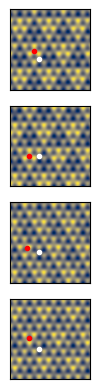

In [151]:
shift1 = [30*cs(-120)]
shift2 = [30*cs(180)]
shift3 = [30*cs(180),30*cs(180)+30*cs(-120)]
shift4 = [30*cs(-120),
          30*cs(180)+30*cs(-120),
          60*cs(-120)]

shiftList = [shift1,shift2,shift3,shift4]

fig,axs = plt.subplots(4,1)
for iax in range(4):
    plt.sca(axs[iax])
    ax = plt.gca()
    shift = shiftList[iax]
    print(shift)
    img = cdw_sup(shift)+ bl
    plt.imshow(img, cmap=cmap)
    # plt.gcf().set_size_inches(12/25.4, 12/25.4)
    
    ax.set_xlim([0,250])
    ax.set_ylim([250,0])
    # plt.gcf().set_size_inches(24/25.4, 24/25.4)
    sactter_center(shift)
    # plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
plt.savefig("C03_fake_stm_images.svg", format="svg", bbox_inches='tight')
    

In [27]:


cs(30).shape

(2,)

In [ ]:
c = np.array([a,b])
c.shape

(2, 3)